In [ ]:
#execute the following code. go to the link showed after executing the code. select the account and sign in
# copy the code such as 4/1AY0e-g6tVgzN_LQ0-pNd5w2i4jztE_zabxGNCNIG-VEwV5hbmxSoCt9AiCM to following prompt.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 5.4MB/s 
     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/Data Science/Projects/Comparison-of-Machine-Learning-Prediction-Models-master/regression/')
# import sys
# sys.path.append('../Utils/')
# from pre_processing import *

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data Science/Projects/smu/captone B/fires-main-2')
DATA_PATH = 'dataset2/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics


h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 'Gradient Boosting']

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier()]

# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            random_state=1, n_clusters_per_class=1)

# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = [make_moons(noise=0.3, random_state=0),
#             make_circles(noise=0.2, factor=0.5, random_state=1),
#             linearly_separable
#             ]

### `Data sets`

In [ ]:
 #data sets
DATA_PATH = 'dataset/'
# files = []
# dfs = []
# dfs_test = []
# pd.set_option('display.max_rows', 100)

file1 = 'data_v4_socal_fires_weather_mgrs_lag.csv'
df1 = pd.read_csv(DATA_PATH+file1, delimiter=',', header=0)


### Data Preprocess



In [ ]:


def under_sampling(X,y, sampling_strategy = 0.8):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    autopct = "%.2f"

    #df1.is_fire.value_counts().plot.pie(autopct=autopct,ax=axs[0])
    y.value_counts().plot.pie(autopct=autopct, ax = axs[0])
    axs[0].set_title('Data Imbalanced')
    print(y.value_counts())


    #X = df1.iloc[:,2:-6]
    #y = df1.iloc[:,-6]

  
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X_res, y_res = rus.fit_resample(X, y)
    y_res.value_counts().plot.pie(autopct=autopct, ax = axs[1])
    axs[1].set_title("Under-sampling")
    print(y_res.value_counts())
    return X_res, y_res

In [ ]:
# Feature Selection with Univariate Statistical Tests



def select_best_feature(X, y, features = 10):
  # feature extraction
  test = SelectKBest(score_func=f_classif, k=features)
  fit = test.fit(X, y)
  # summarize scores
  set_printoptions(precision=3)
  print(fit.scores_)
  features = fit.transform(X_res)
  # summarize selected features
  print(features[0:5,:])
  return features

['is_fire',
 'is_fire_lag1',
 'is_fire_lag2',
 'is_fire_lag3',
 'is_fire_lag4',
 'is_fire_lag5']

In [ ]:
pd.to_datetime('2015-11-30') > pd.to_datetime('2015-10-30')

True

In [ ]:
df1['date']= pd.to_datetime(df1['date'])
index_aft_2013 = df1[df1['date'] >= pd.to_datetime('2013-01-01')].index.tolist()
index_bef_2013 = df1[df1['date'] < pd.to_datetime('2013-01-01')].index.tolist()
data_aft_2013 = df1.iloc[index_aft_2013]
data_bef_2013 = df1.iloc[index_bef_2013]

In [ ]:
data_bef_2013[data_bef_2013['date'] < pd.to_datetime('2008-01-01')].index.tolist()

0    933388
1      6379
Name: is_fire, dtype: int64
0    7973
1    6379
Name: is_fire, dtype: int64
[  22.481  642.33   239.13   799.031   51.166  623.026  203.094   24.085
  420.436    9.759  114.668  113.296  127.016  164.416  570.738  462.189
  364.472  202.89   148.563   97.591  747.922  630.664  527.345  786.272
  868.396  859.457   34.701   44.855   44.311  107.217  103.184  100.361
 4403.349]
[[ 52.     58.9   598.4    55.9    63.333  67.757 592.933 563.514 593.321
    5.   ]
 [ 71.8    85.    631.7    70.933  85.467  90.171 598.133 633.143 646.029
    1.   ]
 [ 76.5    89.6   618.     75.833  88.9    84.857 683.767 674.9   700.964
    0.   ]
 [ 60.4    67.7   528.4    60.867  68.033  74.657 441.167 537.957 564.736
    6.   ]
 [ 53.     58.8   486.8    54.9    60.9    65.286 414.833 499.914 591.907
    1.   ]]
0    933743
1      6024
Name: is_fire_lag1, dtype: int64
0    7530
1    6024
Name: is_fire_lag1, dtype: int64
[  10.965  558.265  181.302  732.211   67.05   593.125  164.8

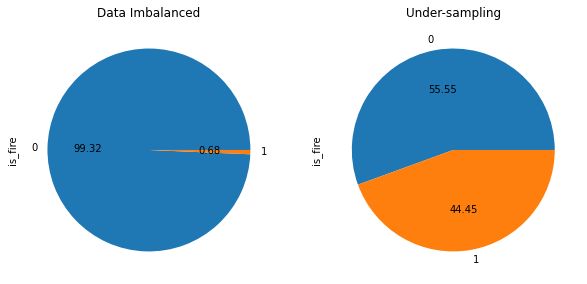

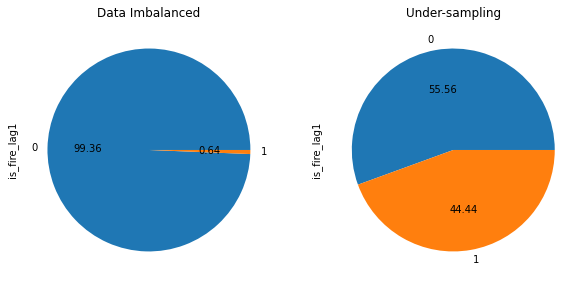

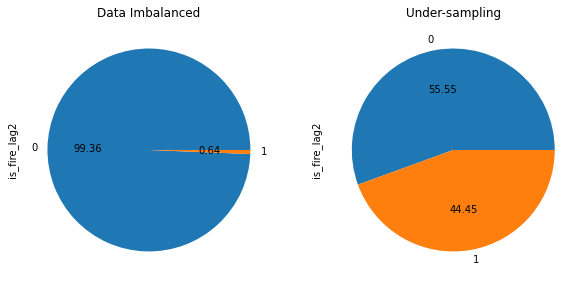

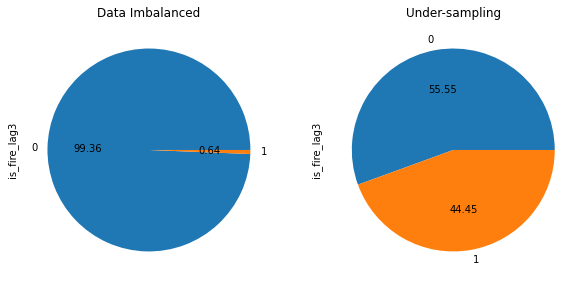

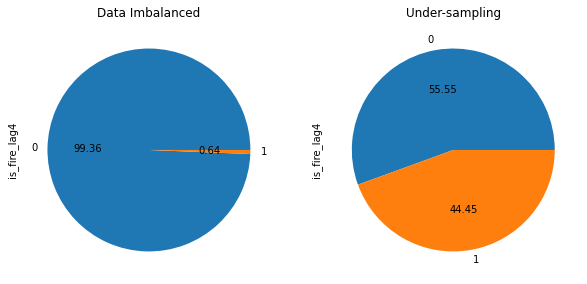

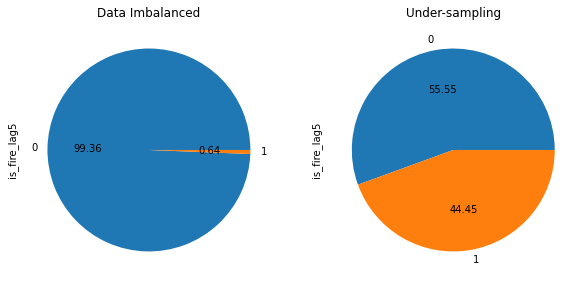

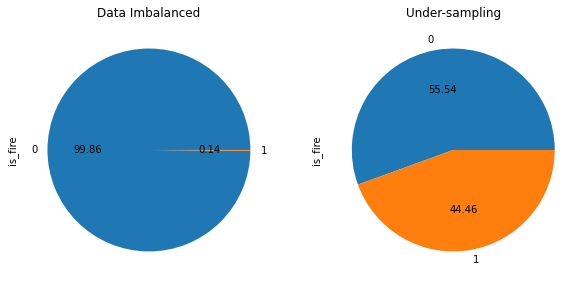

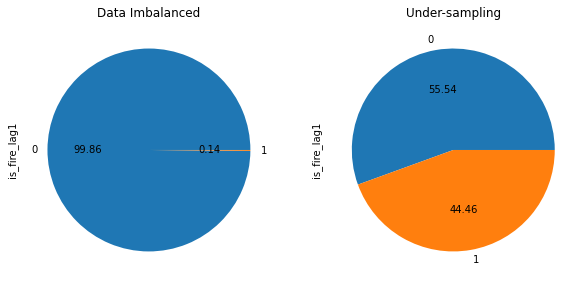

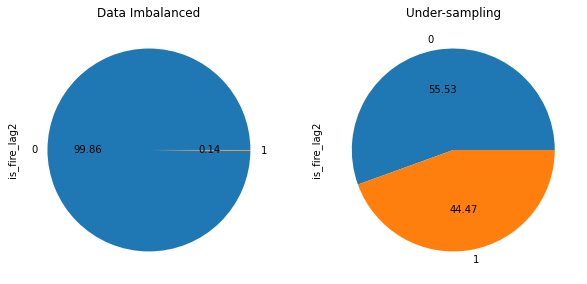

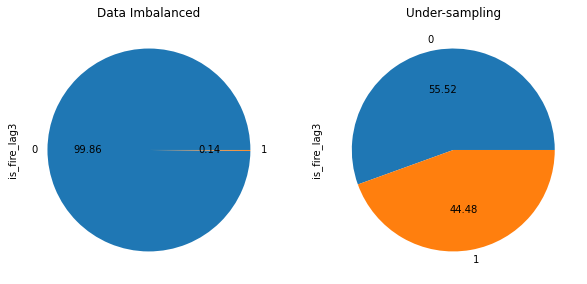

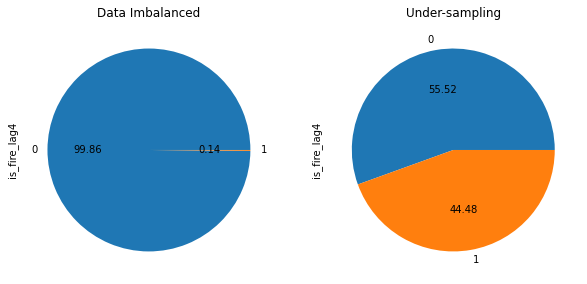

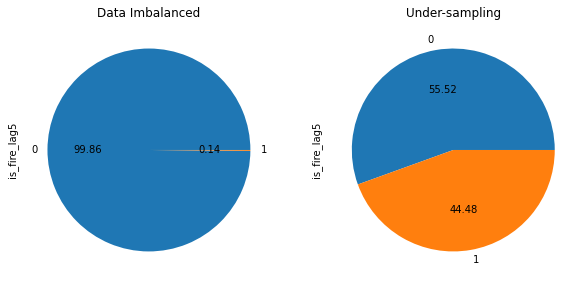

In [ ]:
X_bef_2013 = data_bef_2013.iloc[:,2:-6]
X_aft_2013 = data_aft_2013.iloc[:, 2:-6]
y_bef_2013 = data_bef_2013.iloc[:, -6:]
y_aft_2013 = data_aft_2013.iloc[:, -6:]
datasets_fire_bef_2013 = []
datasets_fire_aft_2013 = []


target = ['is_fire', 'is_fire_lag1', 'is_fire_lag2', 'is_fire_lag3', 'is_fire_lag4', 'is_fire_lag5']

for n in target:
  y = y_bef_2013[n]

  X_res, y_res = under_sampling(X_bef_2013, y)
  X_best_features = select_best_feature(X_res, y_res)
  datasets_fire_bef_2013.append((X_best_features, y_res, n))
  #datasets_fire_bef_2013.append((X_res, y_res, n))



for n in target:
  y = y_aft_2013[n]

  X_res, y_res = under_sampling(X_aft_2013, y)
  X_best_features = select_best_feature(X_res, y_res)
  datasets_fire_aft_2013.append((X_best_features, y_res, n))
  #datasets_fire_aft_2013.append((X_res, y_res, n))






### Model

In [ ]:
model_scores_bef_2013

In [ ]:
# figure = plt.figure(figsize=(27, 9))
# i = 1

model_scores_bef_2013 = pd.DataFrame(columns=['Target', 'Model','Accuracy', 'AUC','Recall', 'Precision', 'F1'])
model_scores_aft_2013 = pd.DataFrame(columns=['Target', 'Model','Accuracy', 'AUC','Recall', 'Precision', 'F1'])


for ds_cnt, ds in enumerate(zip(datasets_fire_bef_2013,datasets_fire_aft_2013)):
  X, y, target_name = ds[0]
  X_test_2013_aft, y_test_2013_aft, target_name_2013_aft = ds[1]

  X = StandardScaler().fit_transform(X)
  X_test_2013_aft = StandardScaler().fit_transform(X_test_2013_aft)

  X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

 
  for name, clf in zip(names, classifiers):
    
    clf.fit(X_train, y_train)
    
    #score = clf.score(X_test, y_test)
    #print(score)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)
    fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    roc_auc0 = metrics.auc(fpr0, tpr0)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    temp = [target_name, name, accuracy, roc_auc0, recall, precision, f1]

    a_series = pd.Series(temp, index = model_scores_bef_2013.columns)
    model_scores_bef_2013 = model_scores_bef_2013.append(a_series, ignore_index=True)
    print(target_name)
    print(name)
    print('Precision score %s' % precision)
    print('Recall score %s' % recall)
    print('F1-score score %s' % f1)
    print('Accuracy score %s' % accuracy)
    print('AUC', roc_auc0)


    y_pred_2013_aft = clf.predict(X_test_2013_aft)
    y_score_2013_aft = clf.predict_proba(X_test_2013_aft)
    fpr0, tpr0, thresholds = roc_curve(y_test_2013_aft, y_score_2013_aft[:, 1])
    
    accuracy = metrics.accuracy_score(y_test_2013_aft, y_pred_2013_aft)
    roc_auc0 = metrics.auc(fpr0, tpr0)
    recall = metrics.recall_score(y_test_2013_aft, y_pred_2013_aft)
    precision = metrics.precision_score(y_test_2013_aft, y_pred_2013_aft)
    f1 = metrics.f1_score(y_test_2013_aft, y_pred_2013_aft)

    temp = [target_name_2013_aft, name, accuracy, roc_auc0, recall, precision, f1]
    a_series = pd.Series(temp, index = model_scores_aft_2013.columns)
    model_scores_aft_2013 = model_scores_aft_2013.append(a_series, ignore_index=True)

    print('-------------------')
    print('after 2013')
    print(target_name_2013_aft)
    print(name)
    print('Precision score %s after 2013' % precision)
    print('Recall score %s after 2013' % recall)
    print('F1-score score %s after 2013' % f1)
    print('Accuracy score %s after 2013' % accuracy)
    print('AUC after 2013', roc_auc0)



is_fire
Nearest Neighbors
Precision score 0.7028483448806775
Recall score 0.7194641449960599
F1-score score 0.7110591900311528
Accuracy score 0.7415534656913967
AUC 0.798564196251927
-------------------
after 2013
is_fire
Nearest Neighbors
Precision score 0.6593406593406593 after 2013
Recall score 0.6106870229007634 after 2013
F1-score score 0.6340819022457067 after 2013
Accuracy score 0.6866515837104072 after 2013
AUC after 2013 0.7344931411721418
is_fire
Linear SVM
Precision score 0.8010526315789473
Recall score 0.5996847911741529
F1-score score 0.6858945470932852
Accuracy score 0.7572274468826193
AUC 0.8571555059721447
-------------------
after 2013
is_fire
Linear SVM
Precision score 0.7987804878048781 after 2013
Recall score 0.6666666666666666 after 2013
F1-score score 0.7267683772538142 after 2013
Accuracy score 0.7771493212669683 after 2013
AUC after 2013 0.8777744956286957
is_fire
RBF SVM
Precision score 0.7616
Recall score 0.7501970055161544
F1-score score 0.7558554982135769
Ac

In [ ]:
result_aft_2013 = model_scores_aft_2013.groupby('Target').agg({'F1': ['max']})


In [ ]:
for n, max in enumerate(result_aft_2013['F1']['max']):
  model = model_scores_aft_2013[model_scores_aft_2013['F1'] == max]
  print(n,max)
  print(model)


0 0.7529976019184652
    Target          Model  Accuracy      AUC    Recall  Precision        F1
3  is_fire  Decision Tree  0.766968  0.87268  0.798982   0.712018  0.752998
1 0.6948130277442703
          Target     Model  Accuracy       AUC    Recall  Precision        F1
16  is_fire_lag1  AdaBoost  0.713801  0.785402  0.732824    0.66055  0.694813
2 0.7
          Target       Model  Accuracy       AUC    Recall  Precision   F1
25  is_fire_lag2  Neural Net  0.740023  0.809203  0.682051   0.718919  0.7
3 0.688
          Target       Model  Accuracy       AUC    Recall  Precision     F1
35  is_fire_lag3  Neural Net  0.731034  0.796219  0.666667   0.710744  0.688
4 0.7121418826739427
          Target       Model  Accuracy       AUC    Recall  Precision        F1
45  is_fire_lag4  Neural Net  0.754936  0.810689  0.681462   0.745714  0.712142
5 0.6874189364461738
          Target              Model  Accuracy  ...    Recall  Precision        F1
59  is_fire_lag5  Gradient Boosting  0.720093  .

In [ ]:
result_bef_2013 = model_scores_bef_2013.groupby('Target').agg({'F1': ['max']})
for n, max in enumerate(result_bef_2013['F1']['max']):
  model = model_scores_bef_2013[model_scores_bef_2013['F1'] == max]
  print(n,max)
  print(model)

0 0.7702440914374273
    Target              Model  Accuracy  ...    Recall  Precision        F1
9  is_fire  Gradient Boosting  0.793452  ...  0.783294   0.757622  0.770244

[1 rows x 7 columns]
1 0.7129629629629629
          Target              Model  Accuracy  ...    Recall  Precision        F1
19  is_fire_lag1  Gradient Boosting  0.748432  ...  0.708194   0.717797  0.712963

[1 rows x 7 columns]
2 0.7094774136403897
          Target    Model  Accuracy       AUC    Recall  Precision        F1
22  is_fire_lag2  RBF SVM  0.757934  0.807771  0.685788   0.734862  0.709477
3 0.7182741116751269
          Target              Model  Accuracy  ...   Recall  Precision        F1
39  is_fire_lag3  Gradient Boosting  0.753607  ...  0.70398   0.733161  0.718274

[1 rows x 7 columns]
4 0.7240926978574552
          Target              Model  Accuracy  ...   Recall  Precision        F1
49  is_fire_lag4  Gradient Boosting  0.766901  ...  0.70229   0.747292  0.724093

[1 rows x 7 columns]
5 0.727577535

In [ ]:
model_scores_bef_2013.to_csv(DATA_PATH+'model_scores_bef_2013.csv')

In [ ]:
model_scores_aft_2013.to_csv(DATA_PATH+'model_scores_aft_2013.csv')

In [ ]:
  model_scores_bef_2013

,Target,Model,Accuracy,AUC,Recall,Precision,F1
0,is_fire,Nearest Neighbors,0.741902,0.797742,0.723404,0.701835,0.712456
1,is_fire,Linear SVM,0.748520,0.849467,0.592593,0.785789,0.675651
2,is_fire,RBF SVM,0.768373,0.835571,0.732072,0.740829,0.736425
3,is_fire,Decision Tree,0.766980,0.849442,0.732861,0.738095,0.735469
4,is_fire,Random Forest,0.727273,0.799254,0.712372,0.683812,0.697800
5,is_fire,Neural Net,0.771508,0.851246,0.743105,0.740770,0.741935
6,is_fire,AdaBoost,0.762452,0.854138,0.766745,0.715968,0.740487
7,is_fire,Naive Bayes,0.644723,0.732791,0.710796,0.580064,0.638810
8,is_fire,QDA,0.737722,0.778190,0.571316,0.776231,0.658193
9,is_fire,Gradient Boosting,0.767328,0.857849,0.762805,0.725094,0.743472


In [ ]:
model_scores_aft_2013[model_scores_aft_2013['F1'] == 0.7592137592137591]

,Target,Model,Accuracy,AUC,Recall,Precision,F1
3,is_fire,Decision Tree,0.778281,0.866008,0.78626,0.733967,0.759214


In [ ]:
model_scores_aft_2013

,Target,Model,Accuracy,AUC,Recall,Precision,F1
0,is_fire,Nearest Neighbors,0.677602,0.724465,0.656489,0.632353,0.644195
1,is_fire,Linear SVM,0.765837,0.857076,0.661578,0.778443,0.715268
2,is_fire,RBF SVM,0.650452,0.746309,0.374046,0.700000,0.487562
3,is_fire,Decision Tree,0.753394,0.848367,0.750636,0.710843,0.730198
4,is_fire,Random Forest,0.720588,0.802190,0.608142,0.719880,0.659310
5,is_fire,Neural Net,0.766968,0.858999,0.753181,0.730864,0.741855
6,is_fire,AdaBoost,0.755656,0.857154,0.755725,0.712230,0.733333
7,is_fire,Naive Bayes,0.684389,0.736639,0.618321,0.653226,0.635294
8,is_fire,QDA,0.627828,0.611988,0.445293,0.611888,0.515464
9,is_fire,Gradient Boosting,0.754525,0.850337,0.750636,0.712560,0.731103


In [ ]:
model_scores_aft_2013[model_scores_aft_2013['Model'] == 'Gradient Boosting']

In [ ]:
model_scores_aft_2013[model_scores_aft_2013['Target'] == 'is_fire_lag3']

In [ ]:
model_scores_aft_2013[['Target','Model','F1']].groupby('Target', sort = True).max()['F1']

,Model,F1
Target,,
is_fire,Random Forest,0.759214
is_fire_lag1,Random Forest,0.716826
is_fire_lag2,Random Forest,0.699371
is_fire_lag3,Random Forest,0.702632
is_fire_lag4,Random Forest,0.697009
is_fire_lag5,Random Forest,0.704348


In [ ]:
model_scores_aft_2013

NameError: ignored

In [ ]:
for i, data in enumerate(zip(datasets_fire_bef_2013, datasets_fire_aft_2013)):
  print(i, data[1])

0 (     pop_density_sqmile  tavg  ...  soil_moisture_14day  mgrs_fires_past3yrs
0            489.996397  53.7  ...             0.001500                    4
1            168.053507  66.7  ...             0.168929                    2
2           5271.017057  71.0  ...             0.072071                    1
3              1.203284  68.7  ...             0.157143                    0
4          45811.627530  66.2  ...             0.000000                    2
..                  ...   ...  ...                  ...                  ...
879         5345.082365  67.0  ...             0.068733                    1
880         5345.082365  63.9  ...             0.000000                    1
881         1006.744919  62.2  ...             0.000000                    2
882         1006.744919  63.1  ...             0.000000                    2
883         1006.744919  64.1  ...             0.000000                    2

[884 rows x 33 columns], 0      0
1      0
2      0
3      0
4      0
  

In [ ]:
for ds_cnt, ds in enumerate(datasets_fire_aft_2013):
   X, y, target_name = ds



In [ ]:
model_scores_aft_2013 = pd.DataFrame(columns=['Target', 'Model','Accuracy', 'AUC','Recall', 'Precision', 'F1'])


In [ ]:
model_scores.describe()

,Accuracy,AUC,Recall,Precision,F1
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.734992,0.802105,0.664783,0.726733,0.690623
std,0.032380,0.035722,0.067601,0.052021,0.037862
min,0.643489,0.728613,0.525298,0.584243,0.619878
25%,0.721549,0.770568,0.625682,0.718834,0.656417
50%,0.742530,0.811862,0.682660,0.734237,0.701075
75%,0.752949,0.825114,0.705962,0.751667,0.715826
max,0.792196,0.873115,0.795392,0.807672,0.771445


In [ ]:
model_scores.groupby('Target').describe()

Accuracy                      ...        F1                    
                count      mean       std  ...       50%       75%       max
Target                                     ...                              
is_fire          10.0  0.764472  0.040700  ...  0.750721  0.761923  0.768934
is_fire_lag1     10.0  0.726116  0.035730  ...  0.696288  0.705952  0.713460
is_fire_lag2     10.0  0.722066  0.032016  ...  0.686347  0.696131  0.709075
is_fire_lag3     10.0  0.723196  0.027242  ...  0.678831  0.702252  0.717328
is_fire_lag4     10.0  0.733173  0.039371  ...  0.692969  0.712410  0.729060
is_fire_lag5     10.0  0.742984  0.030916  ...  0.703008  0.724527  0.735243

[6 rows x 40 columns]

In [ ]:
model_scores

,Target,Model,Accuracy,AUC,Recall,Precision,F1
0,is_fire,Nearest Neighbors,0.755138,0.810789,0.743893,0.714070,0.728676
1,is_fire,Linear SVM,0.760711,0.860952,0.605201,0.805031,0.690958
2,is_fire,RBF SVM,0.793800,0.854531,0.746257,0.778143,0.761866
3,is_fire,Decision Tree,0.789969,0.868122,0.761229,0.763033,0.762130
4,is_fire,Random Forest,0.774991,0.832338,0.742317,0.747026,0.744664
5,is_fire,Neural Net,0.787530,0.865604,0.747833,0.765940,0.756778
6,is_fire,AdaBoost,0.786486,0.868890,0.773050,0.751149,0.761942
7,is_fire,Naive Bayes,0.659352,0.749624,0.716312,0.595285,0.650215
8,is_fire,QDA,0.745037,0.794574,0.579984,0.787166,0.667877
9,is_fire,Gradient Boosting,0.791710,0.876152,0.784082,0.754359,0.768934


In [ ]:
model_scores.to_csv(DATA_PATH + 'model_scores.csv')

### Reference Code

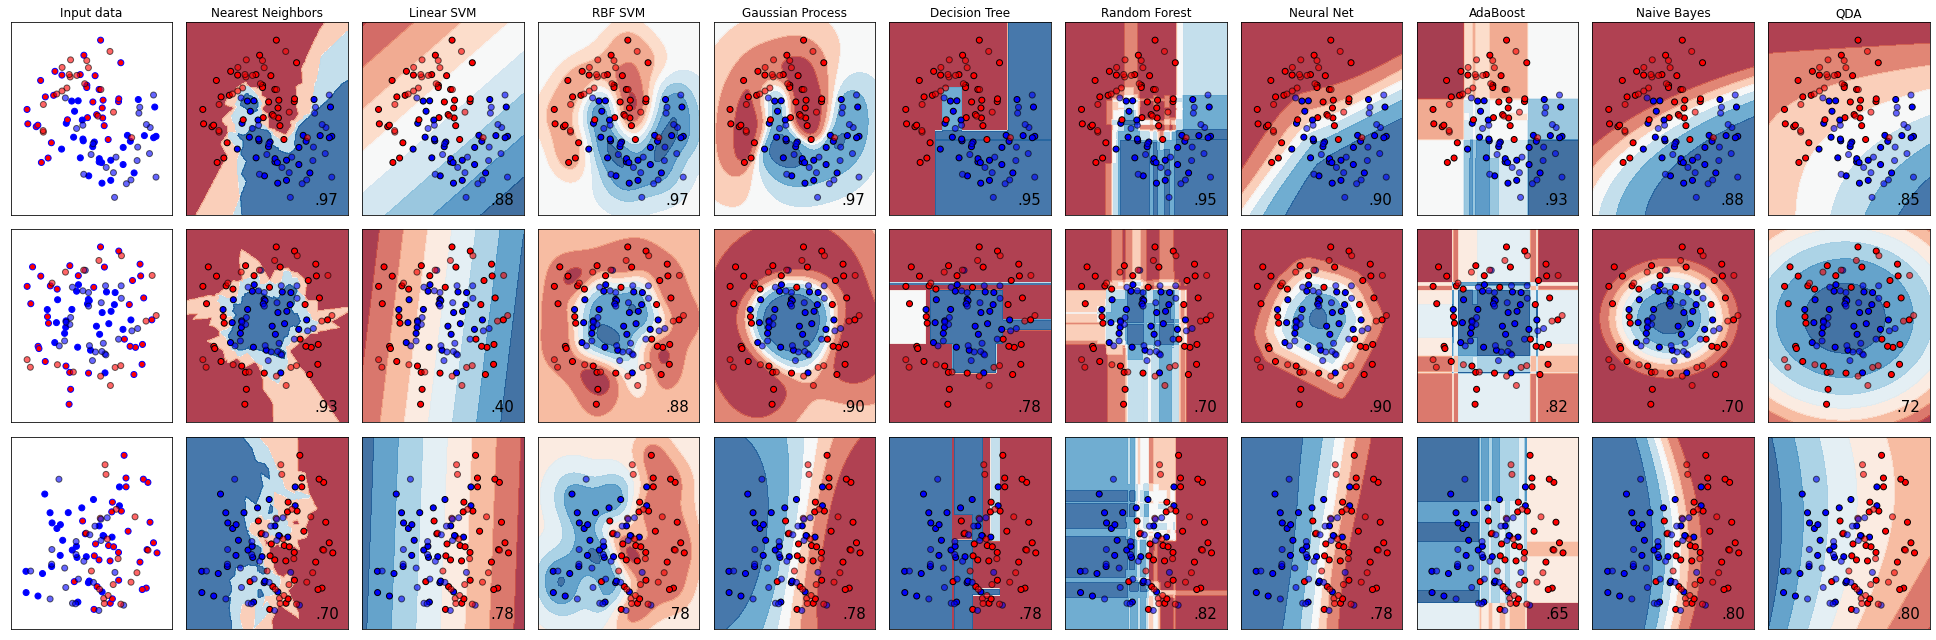

In [ ]:
figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                  edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### Testing

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# generate and prepare the dataset
def get_data():
	# generate dataset
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	# split into train and test
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy

In [ ]:
def get_data():
  X, y, target_name = datasets_fire[0]
  X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
  return X_train, y_train, X_test, y_test


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = keras.Sequential()
	model.add(layers.Dense(100, input_dim=10, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model

Train: 0.800, Test: 0.578


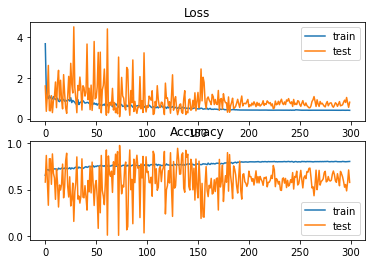

In [ ]:


# multilayer perceptron model for the two circles problem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate dataset
#X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
X, y, target_name = datasets_fire[0]
# split into train and test
#n_test = 500
n_test = int(X.shape[0]*0.8)
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]
# define model
model = Sequential()
model.add(Dense(100, input_dim=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
test_acc

0.5777559280395508

In [ ]:

# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)

ValueError: ignored